In [14]:
import pandas as pd
import numpy as np

pos = pd.read_csv('AMT_pos.csv')
neg = pd.read_csv('AMT_neg.csv')

In [89]:
pos[:5]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,RejectionTime,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.text,Answer.sentiment.label,Approve,Reject
0,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,355,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Positive,NaN,NaN
1,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,487,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Neutral,NaN,NaN
2,3VMV5CHJZ8F47P7CECH0H830NF4GTP,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,1052,0% (0/0),0% (0/0),0% (0/0),funny like a clown\nGreetings again from the d...,Positive,NaN,NaN
3,36GJS3V78VQATMB72I3WF2GRPDDJGN,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,4,0% (0/0),0% (0/0),0% (0/0),Only certain people can relate\nThis is a mov...,Negative,NaN,NaN
4,36GJS3V78VQATMB72I3WF2GRPDDJGN,3N0K7CX2I27L2NR2L8D93MF8LIRA5J,Sentiment analysis,Sentiment analysis,"sentiment, text",$0.02,Fri Nov 01 12:11:19 PDT 2019,3,BatchId:3821427;OriginalHitTemplateId:928390909;,10800,...,NaN,NaN,666,0% (0/0),0% (0/0),0% (0/0),Only certain people can relate\nThis is a mov...,Positive,NaN,NaN


In [27]:
pos.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.text',
       'Answer.sentiment.label', 'Approve', 'Reject'],
      dtype='object')

In [99]:
unique_turkers_pos = np.unique(pos['WorkerId'], return_counts=True)
print(len(unique_turkers_pos[0]))
turker_df = pd.DataFrame(zip(unique_turkers_pos[0], unique_turkers_pos[1]))
sorted(turker_df)
df = pd.DataFrame(turker_df.sort_values(by=1, ascending=False))
# plt.plot(df)
# plt.show()
type(df)

38


pandas.core.frame.DataFrame

In [35]:
unique_turkers_neg = np.unique(neg['WorkerId'], return_counts=True)
len(unique_turkers_neg[0])

53

In [36]:
pos_workers = pos.groupby('WorkerId')

In [38]:
len(pos_workers)

38

In [43]:
bot = neg[neg['WorkerId'] == 'A3HAEQW13YPT6A']

In [84]:
for_plot = np.unique(bot['Answer.sentiment.label'].tolist(), return_counts=True)
for_plot = zip(for_plot[0], for_plot[1])
for_plot

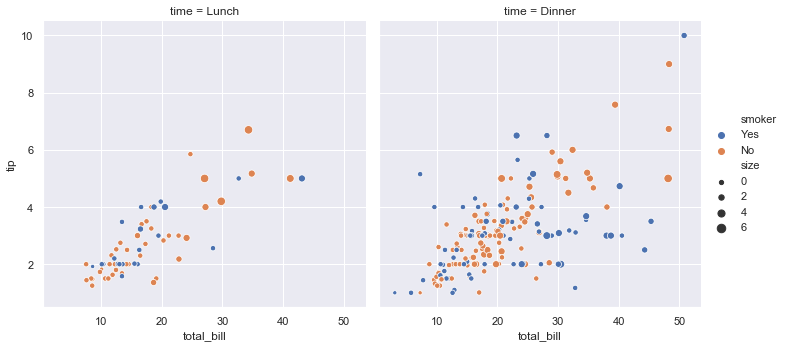

In [86]:
import seaborn as sns
def make_plot(x, y, col, color, size, data):
    sns.set()
    sns.relplot(x=x, y=y, col=col, hue=color, size=size, data=data)

data = sns.load_dataset("tips")
make_plot('total_bill', 'tip', 'time', 'smoker', 'size', data)

In [88]:
data[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


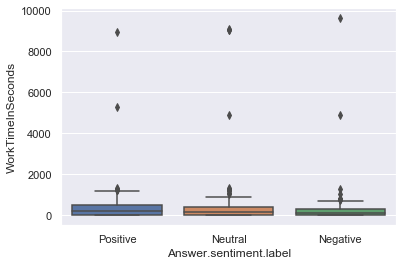

In [90]:
# make_plot('total_bill', 'tip', 'time', 'smoker', 'size', pos)

# sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

sns.boxplot(x="Answer.sentiment.label", y="WorkTimeInSeconds", data=pos)

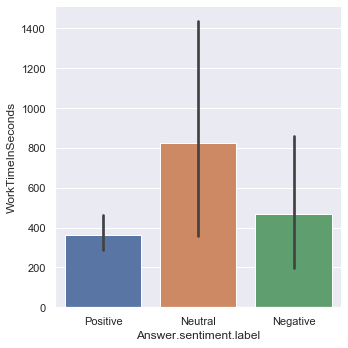

In [91]:
sns.catplot(x="Answer.sentiment.label", y="WorkTimeInSeconds", kind="bar", data=pos);

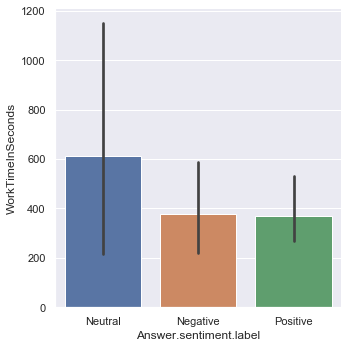

In [92]:
sns.catplot(x="Answer.sentiment.label", y="WorkTimeInSeconds", kind="bar", data=neg);

In [100]:
unique_turkers_pos = np.unique(pos['WorkerId'], return_counts=True)
print(len(unique_turkers_pos[0]))
turker_df = pd.DataFrame(zip(unique_turkers_pos[0], unique_turkers_pos[1]))
sorted(turker_df)
df = pd.DataFrame(turker_df.sort_values(by=1, ascending=False))

38


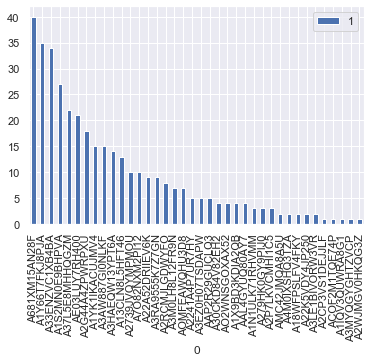

In [102]:
df.plot(kind='bar',x=0,y=1)

In [103]:
from sklearn.metrics import cohen_kappa_score
y1 = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
y2 = [0,1,2,2,4,1,2,3,0,0,0,2,2,4,4]
cohen_kappa_score(y1,y2)


0.33333333333333337

In [105]:
df1=pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: 
                                                            (x=='Neutral').sum()).reset_index(name='Neutral')
df2=pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: 
                                                            (x=='Positive').sum()).reset_index(name='Positive')
df3=pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: 
                                                            (x=='Negative').sum()).reset_index(name='Negative')

In [109]:
# pd.concat([df1, df2, df3], p='')

In [14]:
import pandas as pd
import numpy as np
np.random.seed(2016)

df = pd.DataFrame({'Turker': ['A', 'C', 'B', 'A', 'C', 'C'],
                   'SENTIMENT': ['Neg', 'Pos', 'Neg', 'Neg', 'Pos', 'Neu'],
                   'REVIEW': [1, 2, 3, 4, 5, 6]})

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'SENTIMENT{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
print(result.T)

Turker        A    B    C
SENTIMENT1  Neg  Neg  Pos
SENTIMENT2  Neg  NaN  Pos
SENTIMENT3  NaN  NaN  Neu
REVIEW        5    3   13


In [12]:
df

,Turker,REVIEW,SENTIMENT
0,A,Neg,1
1,C,Pos,2
2,B,Neg,3
3,A,Neg,4
4,C,Pos,5
5,C,Neu,6
